In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import accuracy_score
import random

In [2]:
df = pd.read_csv('sentiment_data.csv')
df.head()

,product_id,product_name,review,sentiment,company
0,AVqkIj9snnc1JgDc3khU,Apple-ipad,My grandkids play on my smaller one. Thought I...,Positive,myntra
1,AVqkIj9snnc1JgDc3khU,Apple-ipad,It has such a BIG screen to see better. It loa...,Positive,amazon
2,AVqkIj9snnc1JgDc3khU,Apple-ipad,Fast fun tablet with great speakers compared t...,Positive,myntra
3,AVqkIj9snnc1JgDc3khU,Apple-ipad,Easy-to-use. Lots of books obviously but also ...,Positive,myntra
4,AVqkIj9snnc1JgDc3khU,Apple-ipad,I have always had a kindle fire but I had one ...,Positive,amazon


In [3]:
len(df)

28038

In [4]:
set(df['sentiment'])

{'Negative', 'Positive'}

In [5]:
data = df['review']
len(data)

28038

In [6]:
sentiment = df['sentiment']
len(sentiment)

28038

In [7]:
vectorizer = TfidfVectorizer()
tr_data = vectorizer.fit_transform(data)

In [8]:
tr_data.shape

(28038, 12376)

## Train-Test data splitting

In [9]:
ids = random.sample(range(len(df)),len(df))
len(ids)

28038

In [10]:
train_count = int(len(df)*.1)
train_count

2803

In [11]:
train_ids = ids[:train_count]
test_ids = ids[train_count:]
len(train_ids),len(test_ids)

(2803, 25235)

In [12]:
X_train = tr_data[train_ids]
X_test = tr_data[test_ids]
y_train = sentiment[train_ids]
y_test = sentiment[test_ids]

## Model Training

In [13]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Sentiment - Prediction

In [14]:
def predict(text):
            
    transformed_text  = vectorizer.transform([text])

    prediction = classifier.predict(transformed_text)
    print(prediction)

In [15]:
text = data[99]
text

'Great tablet for the price. It is easy to navigate.'

In [16]:
predict(text)

['Positive']


In [17]:
y_test[99]

'Positive'

## Model Accuracy on Test data

In [18]:
predictions = classifier.predict(X_test)

In [19]:
accuracy_score(y_test,predictions)

0.9295026748563503

## Sentiment Analysis on Different Products

In [20]:
test_df = df.iloc[test_ids]
len(test_df)

25235

In [21]:
from matplotlib import pyplot as plt

In [22]:
labels = ['Positive','Negative']

In [23]:
def get_output(pro):
    pro_df = test_df[test_df['product_name'] == pro]
    pro_companies = set(pro_df['company'])   

    outputs = []
    for company in pro_companies:
        c_pro_df = pro_df[pro_df['company'] == company]
        pos_count = (c_pro_df['sentiment']=='Positive').sum()
        neg_count = (c_pro_df['sentiment']=='Negative').sum()
        outputs.append([pos_count,neg_count,pos_count/len(c_pro_df),company])
    
    outputs = sorted(outputs,key = lambda x: x[2],reverse=True)
    for (pos,neg,score,company) in outputs:
        plt.pie([pos,neg],labels=labels,autopct='%1.2f%%')
        plt.title(company)
        plt.show()

In [24]:
products = list(set(df['product_name']))
products

['Dell-Laptop',
 'Poco-F1',
 'Oneplus-Tv',
 'Mi-USB-Cable',
 'JBL-Speaker',
 'Boat-Headset',
 'Kindle',
 'Oneplus-7-Mobile',
 'Moto-Charger',
 'Apple-ipad',
 'iPhone-10',
 'Vivo-U10',
 'Realme-5-Pro',
 'Samsung-Tab',
 'OPPO-F15',
 'Fire-HD-8-Tablet',
 'Sony-Haedphone',
 'Mi-Power-Bank',
 'Coolpad-Cool-5',
 'HP-Laptop']

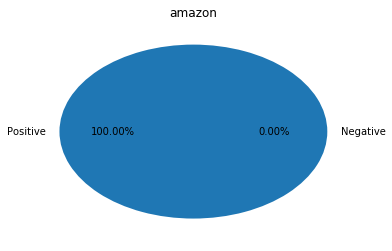

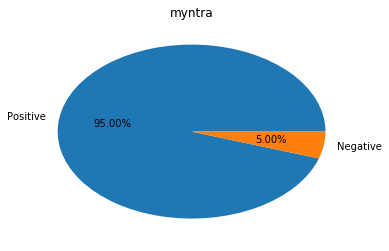

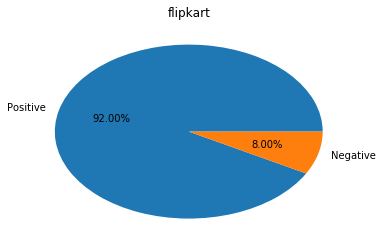

In [25]:
get_output('Realme-5-Pro')